<a href="https://colab.research.google.com/github/hadiSahin/introduction-to-machine-learning/blob/main/Homeworks/hw2_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 2**

Import Boston Dataset from sklearn dataset class.

Explore and analyse raw data.

Do preprocessing for regression.

Split your dataset into train and test test (0.7 for train and 0.3 for test).

Try Ridge and Lasso Regression models with at least 5 different alpha value for each.

Evaluate the results of all models and choose the best performing model.

In [340]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [341]:
from sklearn.datasets import load_boston
import pandas as pd
X , y = load_boston(return_X_y=True)
X = pd.DataFrame(X,columns = load_boston().feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [342]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [343]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


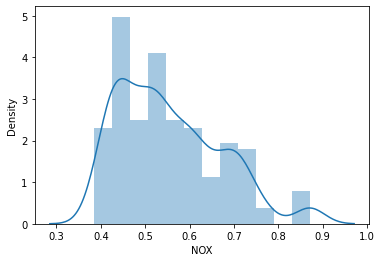

In [344]:
# verilerin gorsel dagilimina bakalim.sadece birini gosteriyorum
sns.distplot(X.NOX)

In [345]:
#multicollinearity icin inputlar arasindaki korelasyona bakalim
X.corr(method='pearson')>0.8

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,True,False,False,False,False,False,False,False,False,False,False,False,False
ZN,False,True,False,False,False,False,False,False,False,False,False,False,False
INDUS,False,False,True,False,False,False,False,False,False,False,False,False,False
CHAS,False,False,False,True,False,False,False,False,False,False,False,False,False
NOX,False,False,False,False,True,False,False,False,False,False,False,False,False
RM,False,False,False,False,False,True,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,False,False,False
DIS,False,False,False,False,False,False,False,True,False,False,False,False,False
RAD,False,False,False,False,False,False,False,False,True,True,False,False,False
TAX,False,False,False,False,False,False,False,False,True,True,False,False,False


In [346]:
# TAX ve RAD arasinda yuksek korelasyon var. birini dusurelim
X_new = X.drop(['RAD'], axis = 1)

In [349]:
X_s = preprocessing.scale(X_new)
X_s = pd.DataFrame(X_s, columns = X_new.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s)
#display(X_s)
#display(y_s)



In [350]:
#veriyi train ve test set olarak bol
X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 17)

In [351]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
print("Basic Train: ", regression_model.score(X_train, y_train))
print("Basic Test: ", regression_model.score(X_test, y_test))


Basic Train:  0.7179348150296078
Basic Test:  0.7510063701500108


In [352]:
for i in [0.001,0.1,1,5,10]:
  print(i)
  ridge_model = Ridge(alpha = i)
  ridge_model.fit(X_train, y_train)
  print("Ridge Train: ", ridge_model.score(X_train, y_train))
  print("Ridge Test: ", ridge_model.score(X_test, y_test))

0.001
Ridge Train:  0.7179348150212954
Ridge Test:  0.7510063566180949
0.1
Ridge Train:  0.7179347321146609
Ridge Test:  0.7510049215490247
1
Ridge Train:  0.7179267090038078
Ridge Test:  0.7509834276064659
5
Ridge Train:  0.7177506380422056
Ridge Test:  0.7507248471389221
10
Ridge Train:  0.7172744375938345
Ridge Test:  0.7501044380006288


In [353]:
for i in [0.00001,0.001,0.01,0.05,1]:
  print(i)
  lasso_model = Lasso(alpha = i)
  lasso_model.fit(X_train, y_train)
  print("Lasso Train: ", lasso_model.score(X_train, y_train))
  print("Lasso Test: ", lasso_model.score(X_test, y_test))

1e-05
Lasso Train:  0.717934812065165
Lasso Test:  0.7510041693976032
0.001
Lasso Train:  0.717900563317673
Lasso Test:  0.7506772162339196
0.01
Lasso Train:  0.7161783635917516
Lasso Test:  0.7470137428079202
0.05
Lasso Train:  0.6855770647232635
Lasso Test:  0.7003977954423904
1
Lasso Train:  0.0
Lasso Test:  -0.0030704836212473996


In [ ]:
benim analizimde ridge ve lasso icin daha kucuk alpha degerleri daha yuksek fit gosterdi. Yine de ridge ve lasso regularizationi yapilmadan calistirilan temel model hepsinden daha iyi bir sonuc verdi.
outlier kaynaklı bir durum mu diye kontrol ettim. ama outlierları dusurunce daha dusuk fir oranları buldum.